<a href="https://colab.research.google.com/github/minhhuong05/Econometrics_Midterm_Assignment/blob/main/model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTE: Tạo thư mục DATA trong Drive và up file 'bank-additional-full.csv' vào trước khi chạy.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/bank-additional-full.csv

/content/drive/MyDrive/bank-additional-full.csv


In [ ]:
link = '/content/drive/MyDrive/DATA/bank-additional-full.csv'

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split



# 1.Quy trình thực hiện



**B1.Tải dữ liệu**
1. *data0* chứa dữ liệu gốc
2. *data* là dữ liệu đã được loại bỏ những dòng bị trùng
- Ngoài ra, *data* loại bỏ cột 'duration' vì nó sẽ làm model bị overfitting, cột 'pdays', 'previous', 'poutcome' do thiếu quá nhiều dữ liệu

**B2.Các bước để chọn biến**
1. Chuyển dữ liệu chữ sang dữ liệu số
- 1.1. Chuyển month, day_of_week sang số. Ví dụ: jan = 1, feb = 2,... Tương tự, mon = 2, tue = 3, ...
- 1.2. Vì các biến còn lại là nominal data, vì thế cần phải tạo biến giả. Ví dụ: cột 'martial' có 3 giá trị married, single, divorce thì tạo ra 2 biến giả là marital_married, marital_single có 2 giá trị 0 hoặc 1
2. Chuyển các dữ liệu số theo thứ tự (vì có thế các biến chứa số âm)
- 2.1. X sẽ chứa dữ liệu của tất cả các biến ngoại trừ biến 'y_yes' (outcome). Y chứa biến 'y_yes'
- 2.2. Chia dữ liệu thành 2 tập: train và test (*X_train*, *X_test*, *y_train*, *y_test*)
- 2.3. Chuyển tập train và test về các số nguyên dương có thứ tự. Ví dụ: cột 'cons_conf_idx' (CCI) chứa các giá trị âm với giá trị nhỏ nhất lần lượt là -36, -36.7, -36.9, sau khi encoding, các giá trị đó được đưa về số dương theo thứ tự 1, 2, 3
3. Chi-squared test
- 3.1. Test tầm quan trọng của từng biến. Biến *X_train_fs*, *X_test_fs* chứa dữ liệu của 5 cột có điểm cao nhất

**B3.Modeling**
1. Sử dụng *X_train_fs* và *y_train_enc* để train. *X_test_fs* và *y_test_enc* để dự đoán.



```
# This is formatted as code
```

# 2.Tải dữ liệu và chọn biến

In [ ]:
# load file, remove duplicate
data0 = pd.read_csv(link)
data = data0.drop_duplicates().drop(['duration', 'pdays', 'previous', 'poutcome'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  emp.var.rate    41176 non-null  float64
 12  cons.price.idx  41176 non-null  float64
 13  cons.conf.idx   41176 non-null  float64
 14  euribor3m       41176 non-null  float64
 15  nr.employed     41176 non-null  float64
 16  y               41176 non-null  object 
dtypes: float64(5), int64(2), object(10)


In [ ]:
# mapping for ordinal data, create binary columns for nominal data
month_map = {'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_map = {'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6}
data['month'] = data['month'].map(month_map)
data['day_of_week'] = data['day_of_week'].map(day_map)
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,month,day_of_week,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,y_yes
0,56,5,2,1,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,False,False,False,False,False,True,False
1,57,5,2,1,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,True,False,False,False,False,False,True,False
2,37,5,2,1,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,False,False,True,False,False,True,False
3,40,5,2,1,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,False,False,False,False,False,True,False
4,56,5,2,1,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,False,False,False,False,True,True,False


In [ ]:
# convert input and outcome into ordinal data
def prepare_inputs(X_train, X_test):
	X_combined = pd.concat([X_train, X_test], axis=0)

	oe = OrdinalEncoder()
	oe.fit(X_combined)

	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

def chi2_select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
# get data
X = data.drop('y_yes', axis=1)
y = data['y_yes']
# training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# enconding data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = chi2_select_features(X_train_enc, y_train_enc, X_test_enc)

<BarContainer object of 37 artists>

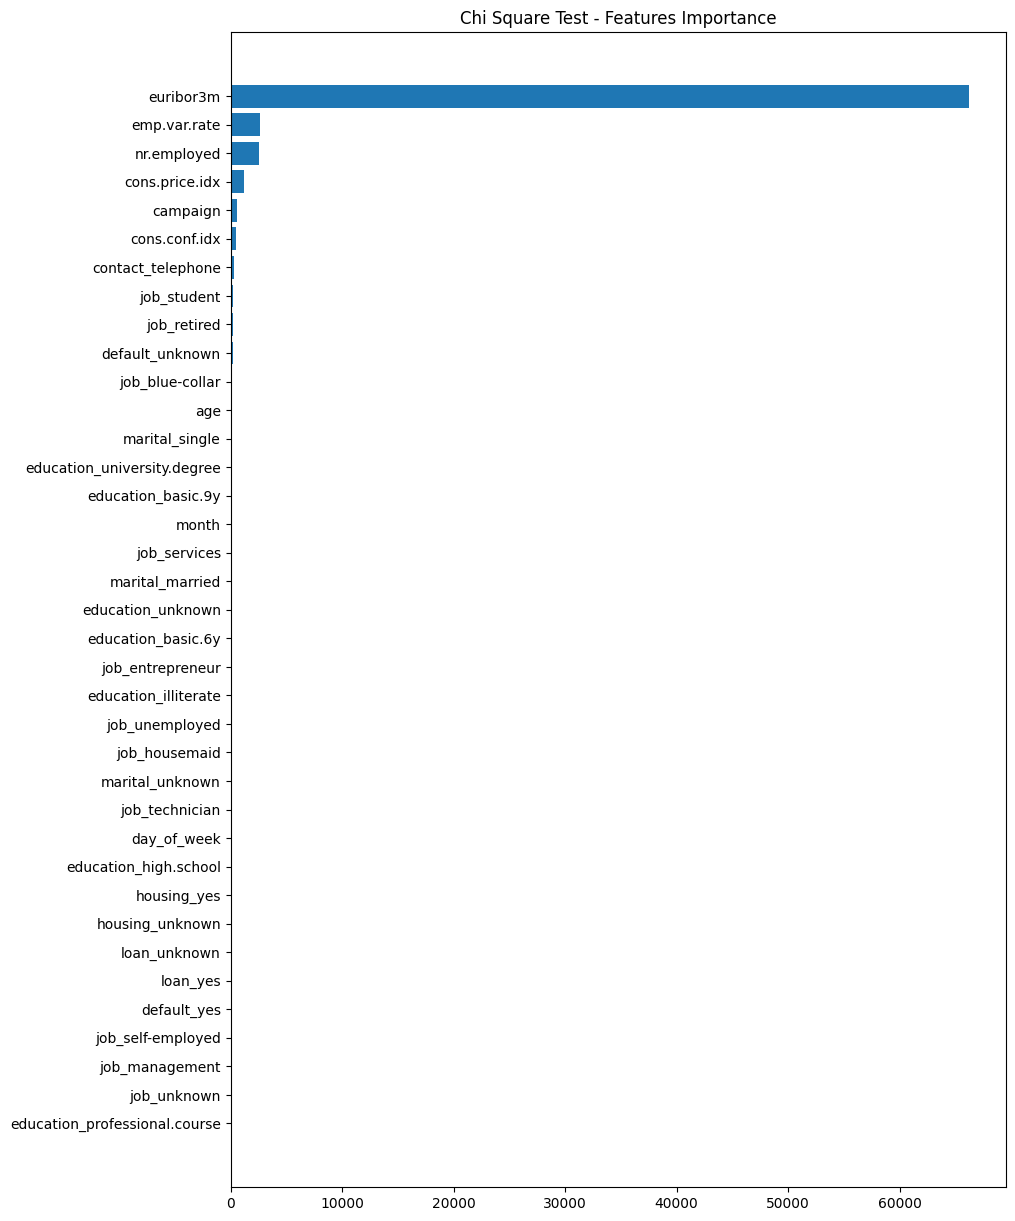

In [ ]:
# feature importance
dfscore = pd.DataFrame(fs.scores_)
dfcolumn = pd.DataFrame(X.columns)
fearureScore = pd.concat([dfcolumn, dfscore], axis=1)
fearureScore.columns = ['Feature', 'Score']
fearureScore = fearureScore.sort_values(by='Score', ascending=True).reset_index()
plt.subplots(figsize=(10, 15))
plt.title('Chi Square Test - Features Importance')
plt.barh(y=fearureScore['Feature'], width=fearureScore['Score'])

## 2.1.Các biến được chọn

1. euribor3m
2. emp.var.rate
3. nr.employed
4. cons_price_id
5. campaign

# 3.Linear Regression Model

In [ ]:
# linear regressionmodeling
model = LinearRegression()
model.fit(X_train_fs, y_train_enc)
# Evaluate the accuracy of the model
accuracy = model.score(X_test_fs,y_test_enc)
print("Accuracy:", accuracy)
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
y_pred = model.predict(X_test_fs)
print('MSE:', mean_squared_error(y_test_enc, y_pred))
# Equation
features = fearureScore.nlargest(5, 'Score').reset_index().sort_values(by='index')['Feature'].tolist()
coeffs = model.coef_
MLRE = f'P(y) = {round(model.intercept_, 5)}'
for i in range(len(features)):
	if coeffs[i] < 0: sign = '-'
	else: sign = '+'
	MLRE += f' {sign} {abs(round(float(coeffs[i]), 5))}*{features[i]}'
print(f'Linear Regression Equation: {MLRE}')

Accuracy: 0.15921181374156823
Intercept: 0.5749745379921355
Coefficient: [-2.45630760e-03  1.82842611e-02 -4.59046114e-05 -1.69062455e-03
 -1.85654208e-02]
MSE: 0.08323857144897938
Linear Regression Equation: P(y) = 0.57497 - 0.00246*campaign + 0.01828*emp.var.rate - 5e-05*cons.price.idx - 0.00169*euribor3m - 0.01857*nr.employed


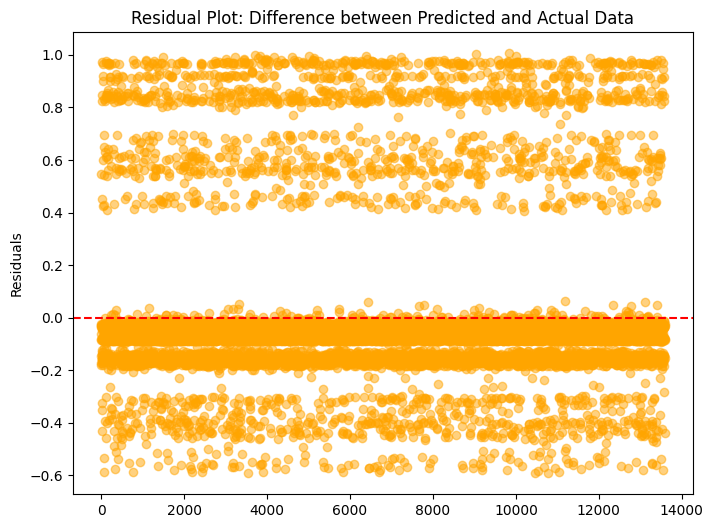

In [ ]:
predictions = model.predict(X_test_fs)
residuals = y_test_enc - predictions

plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, color='orange', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.ylabel('Residuals')
plt.title('Residual Plot: Difference between Predicted and Actual Data')
plt.show()

## 3.1.Tổng kết linear regression model


1. **Equation:**
- P(y) = 0.57497 - 0.00246campaign + 0.01828emp.var.rate - 5e-05cons.price.idx - 0.00169euribor3m - 0.01857nr.employed
- P(y) : Xác suất khách hàng sẽ đăng ký dịch vụ của ngân hàng (0 <= P(y) <= 1)
- emp.var.rate: Là một chỉ số thể hiện sự thay đổi về việc làm trong một quý. Nó đo lường tốc độ tăng hoặc giảm của việc làm trong thời gian ngắn (continuous data)
- cons.price.idx: Chỉ số giá tiêu dùng (CPI) (continuous data)
- euribor3m: lãi suất trong 3 tháng của các ngân hàng liên Châu Âu (continuous data)
- nr.employed: số lượng nhân viên - chỉ số hàng quý (continuous data)
- campaign: số lần một khách hàng được liên lạc
2. **Interpretation:**
- Intercept: Nếu tất cả các yếu tố bằng 0, xác suất khách hàng sẽ đồng ý sẽ là 57.5%
- Nếu emp.var.rate tăng 1 đơn vị và các yếu tố khác giữ nguyên, xác suất sẽ tăng 1.828%
- Nếu cons.price.idx tăng 1 đơn vị và các yếu tố khác giữ nguyên, xác suất sẽ giảm 0.005%
- Nếu euribor3m tăng 1 đơn vị và các yếu tố khác giữ nguyên, xác suất sẽ giảm 0.169%
- Nếu nr.employed tăng 1 đơn vị và các yếu tố khác giữ nguyên, xác suất sẽ giảm 1.857%
- Nếu campaign tăng 1 đơn vị và các yếu tố khác giữ nguyên, xác suất sẽ giảm 0.246%
2. **R-squared :** 0.15921181374156823 ~ 16%
3. **Mean squared error:** 0.08323857144897938
---
**Nhận Xét**
- Đôi với data có categorical outcome (yes/no), linear regression cực kỳ không phù hợp với tập dữ liệu này. Bằng chứng cho việc này đó là R-squared cực kỳ thấp ~16%, nghĩa là khoảng 16% dữ liệu phù hợp với model này. Vì thế nên đưa vào một model khác phù hợp hơn,.

# 4.Logistic Regression Model

In [ ]:

# logistic regression
model = LogisticRegression()
model.fit(X_train_fs, y_train_enc)
# Evaluate the accuracy of the model
accuracy_train = model.score(X_train_fs,y_train_enc)
accuracy_test = model.score(X_test_fs,y_test_enc)
print("Accuracy of training:", accuracy_train)
print("Accuracy of testing:", accuracy_test)
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
y_pred = model.predict(X_test_fs)
print('MSE:', mean_squared_error(y_test_enc, y_pred))
# Equation
features = fearureScore.nlargest(5, 'Score').reset_index().sort_values(by='index')['Feature'].tolist()
coeffs = model.coef_
MLRE = f'Ln(odds of P(y)) = {round(model.intercept_[0], 4)}'
for i in range(len(features)):
	if coeffs[0][i] < 0: sign = '-'
	else: sign = '+'
	MLRE += f' {sign} {abs(round(float(coeffs[0][i]), 4))}*{features[i]}'
print(f'Logistic Regression Equation: {MLRE}')

Accuracy of training: 0.8883169608873744
Accuracy of testing: 0.8910147913753771
Intercept: [0.77664905]
Coefficient: [[-0.05802878 -0.02117454 -0.00023767 -0.00592893 -0.18252071]]
MSE: 0.10898520862462285
Logistic Regression Equation: Ln(odds of P(y)) = 0.7766 - 0.058*campaign - 0.0212*emp.var.rate - 0.0002*cons.price.idx - 0.0059*euribor3m - 0.1825*nr.employed


## 4.1.Tổng kết logistic regression

1. **Equation:**
- $\ln\left(\frac{P(y)}{1 - P(y)}\right)$ = 0.7766 - 0.058campaign - 0.0212emp.var.rate - 0.0002cons.price.idx - 0.0059euribor3m - 0.1825nr.employed
- Ở đây sử dụng $\ln\left(\frac{P(y)}{1 - P(y)}\right)$ vì coefficients in the logistic model output represent the average change in the log odds of the response variable associated with a one unit increase in the predictor variable.*(không biết dịch tiếng việt nnao:))*
- Các biến còn lại đã nói ở trên
2. **Interpretation:**
- Intercept: Nếu tất cả các yếu tố bằng 0, xác suất khách hàng sẽ đồng ý sẽ là $\ln\left(\frac{P(y)}{1 - P(y)}\right)$ = 0.7766
- Nếu emp.var.rate tăng 1 đơn vị và các yếu tố khác giữ nguyên, $\ln\left(\frac{P(y)}{1 - P(y)}\right)$ sẽ giảm 0.0212 đơn vị
- Nếu cons.price.idx tăng 1 đơn vị và các yếu tố khác giữ nguyên, $\ln\left(\frac{P(y)}{1 - P(y)}\right)$ sẽ giảm 0.0002 đơn vị
- Nếu euribor3m tăng 1 đơn vị và các yếu tố khác giữ nguyên, $\ln\left(\frac{P(y)}{1 - P(y)}\right)$ sẽ giảm 0.0059 đơn vị
- Nếu nr.employed tăng 1 đơn vị và các yếu tố khác giữ nguyên, $\ln\left(\frac{P(y)}{1 - P(y)}\right)$ sẽ giảm 0.1425 đơn vị
- Nếu campaign tăng 1 đơn vị và các yếu tố khác giữ nguyên, $\ln\left(\frac{P(y)}{1 - P(y)}\right)$ sẽ giảm 0.058 đơn vị
2. **R-squared :** 0.8910147913753771 ~ 89%
3. **Mean squared error:** 0.10898520862462285
---
**Nhận Xét**
- Có thể thấy model rất khớp với dữ liệu với độ chính xác lên tới 89%
